Challenge 1
Plot domestic total gross over time

In [3]:
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
movies = pd.read_csv('2013_movies.csv',header=0,index_col=6,parse_dates=True)
#movies = pd.read_csv('2013_movies.csv')
movies.head()
#type(movies['Runtime'])

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
ReleaseDate,,,,,,
2013-11-22,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146
2013-05-03,Iron Man 3,200000000,409013994,Shane Black,PG-13,129
2013-11-22,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108
2013-07-03,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98
2013-06-14,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143


In [15]:
print movies.columns
print movies.index

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating', u'Runtime'], dtype='object')
<class 'pandas.tseries.index.DatetimeIndex'>
[2013-11-22, ..., 2013-12-18]
Length: 100, Freq: None, Timezone: None


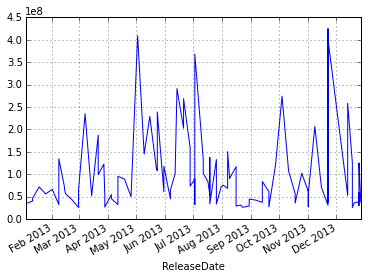

In [9]:
%matplotlib inline
movies['DomesticTotalGross'].plot(kind='line')
#plt.plot(movies['DomesticTotalGross'])


Challenge 2
Plot runtime vs domestic total gross


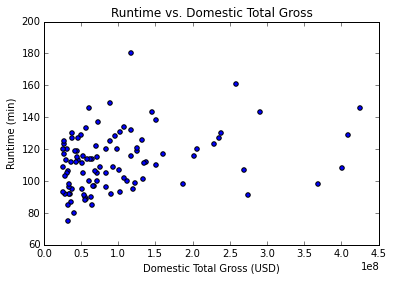

In [12]:
plt.scatter(movies['DomesticTotalGross'],movies[['Runtime']])
plt.title('Runtime vs. Domestic Total Gross')
plt.xlabel('Domestic Total Gross (USD)')
plt.ylabel('Runtime (min)')


Challenge 3
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating


In [27]:
movies_groupedby_rating = movies.groupby('Rating')
print movies_groupedby_rating['Runtime'].mean()

Rating
G        107.000000
PG        99.933333
PG-13    117.510638
R        110.729730
Name: Runtime, dtype: float64



Challenge 4
Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross


In [27]:
movies.loc[movies['Rating'] == 'G'].head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
ReleaseDate,,,,,,
2013-06-21,Monsters University,NaN,268492764,Dan Scanlon,G,107


In [25]:
movies.head()
movies.loc[movies['Rating'] == 'G'].head()
movies.loc[movies['Rating'] == 'PG'].head()
movies.loc[movies['Rating'] == 'PG-13'].head()
movies.loc[movies['Rating'] == 'R'].head()
plot = plt.figure(1)
movies.loc[movies['Rating']=='G']['DomesticTotalGross'].plot(label='G')
movies.loc[movies['Rating']=='PG']['DomesticTotalGross'].plot(label='PG')
movies.loc[movies['Rating']=='PG-13']['DomesticTotalGross'].plot(label='PG-13')
movies.loc[movies['Rating']=='R']['DomesticTotalGross'].plot(label="R")
plt.title('Time dependence on Domestic Total Gross per MPAA rating')
plt.ylabel('DomesticTotalGross (USD)')
plt.legend()
plt.show()


Challenge 5
What director in your dataset has the highest gross per movie?


In [54]:
movies.head()
movies_groupedby_director = movies.groupby('Director')
DTG_by_director = movies_groupedby_director['DomesticTotalGross'].sum()
DTG_by_director.head()
DTG_by_director.sort(ascending=False)
DTG_by_director.head()

Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
Name: DomesticTotalGross, dtype: int64


Challenge 6
Bin your dataset into years (if applicable) and make a bar graph with error bars of gross each year


In [57]:
from datetime import datetime, time
# only 2013
movies_groupedby_month = movies.groupby(lambda x: x.month)
DTG_by_month = movies_groupedby_month['DomesticTotalGross'].sum()
DTG_by_month_std = movies_groupedby_month['DomesticTotalGross'].std()
plt.bar(np.array(DTG_by_month.index))